In [22]:
import cv2
from matplotlib import pyplot as plt
import sklearn
import sklearn.preprocessing

In [88]:
IMAGE_FILE = 'light-tones.jpg'
IMAGE_HYDRANT = 'hydrant.jpg'
IMAGE_HYDRANT_2 = 'hydrant2.jpg'

In [63]:
def calcHistNormalized(images, *args, **kwargs):
    hist = cv2.calcHist(images, *args, **kwargs)
    sklearn.preprocessing.normalize(hist, norm='l1', axis=0, copy=False)
    return hist

In [64]:
calcHist = calcHistNormalized

In [65]:
# https://lmcaraig.com/image-histograms-histograms-equalization-and-histograms-comparison/
def draw_image_histogram(image, channels, color='k'):
    hist = calcHist([image], channels, None, [256], [0, 256])
    print hist.shape
    print sum(hist)
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

In [66]:
def show_grayscale_histogram(image):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    draw_image_histogram(grayscale_image, [0])
    plt.show()

(256, 1)
[0.9999999]


<IPython.core.display.Javascript object>


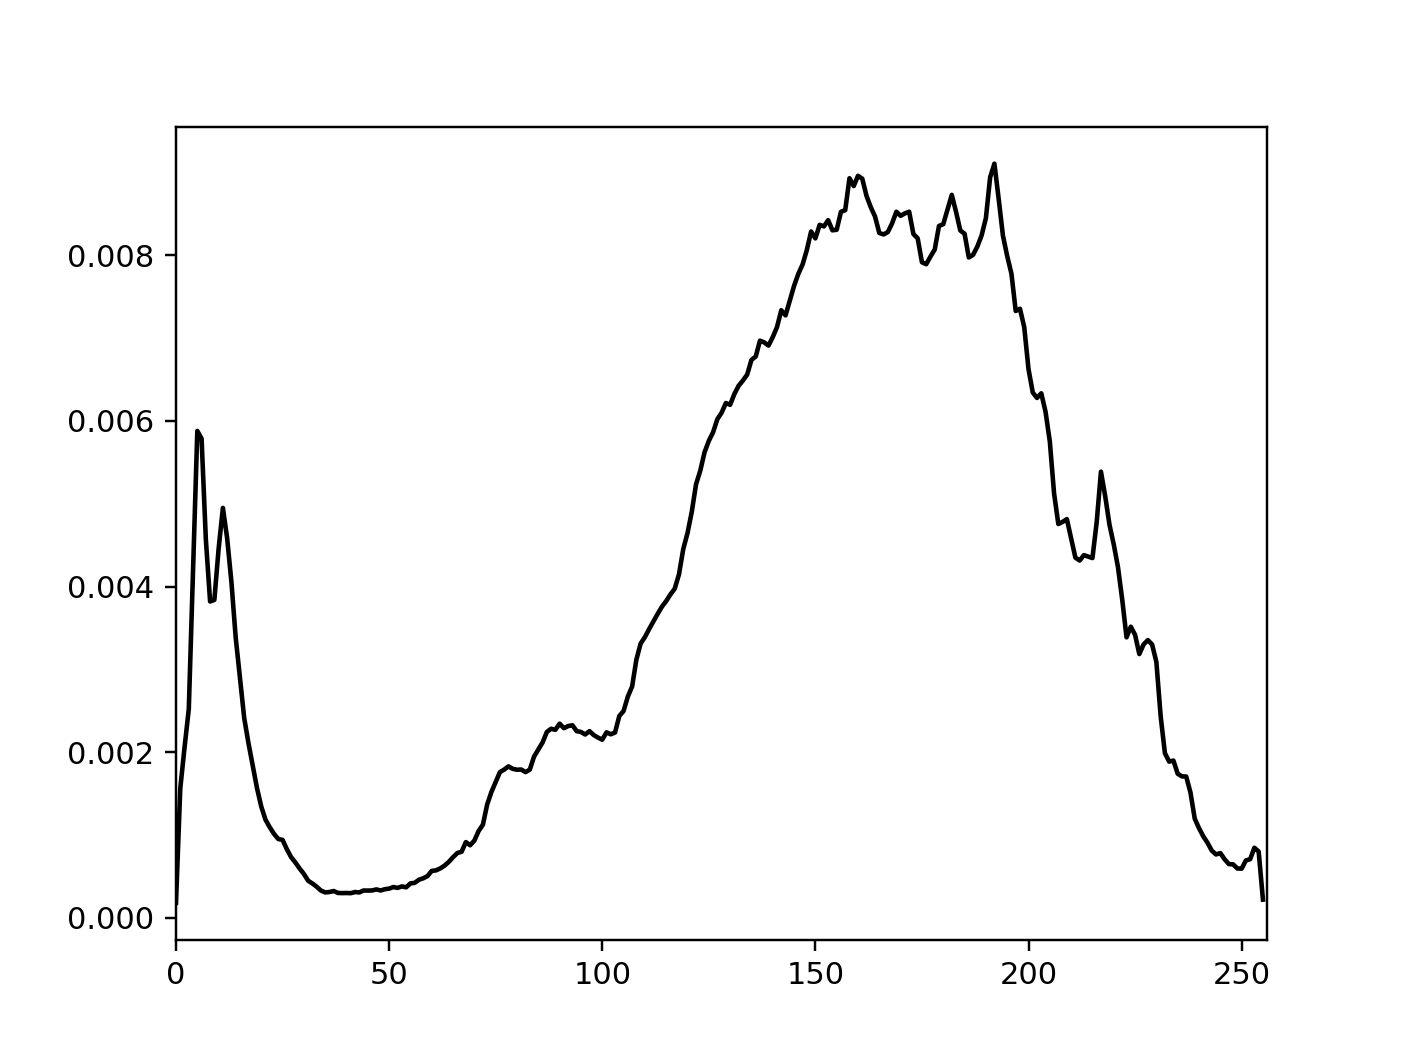

In [67]:
%matplotlib notebook

show_grayscale_histogram(cv2.imread(IMAGE_FILE))

Expected:
![](https://lmcaraig.com/content/images/2017/12/light-tones-hist.png)

In [68]:
def show_color_histogram(image):
    for i, col in enumerate(['b', 'g', 'r']):
        draw_image_histogram(image, [i], color=col)
    plt.show()

(256, 1)
[0.9999999]


<IPython.core.display.Javascript object>


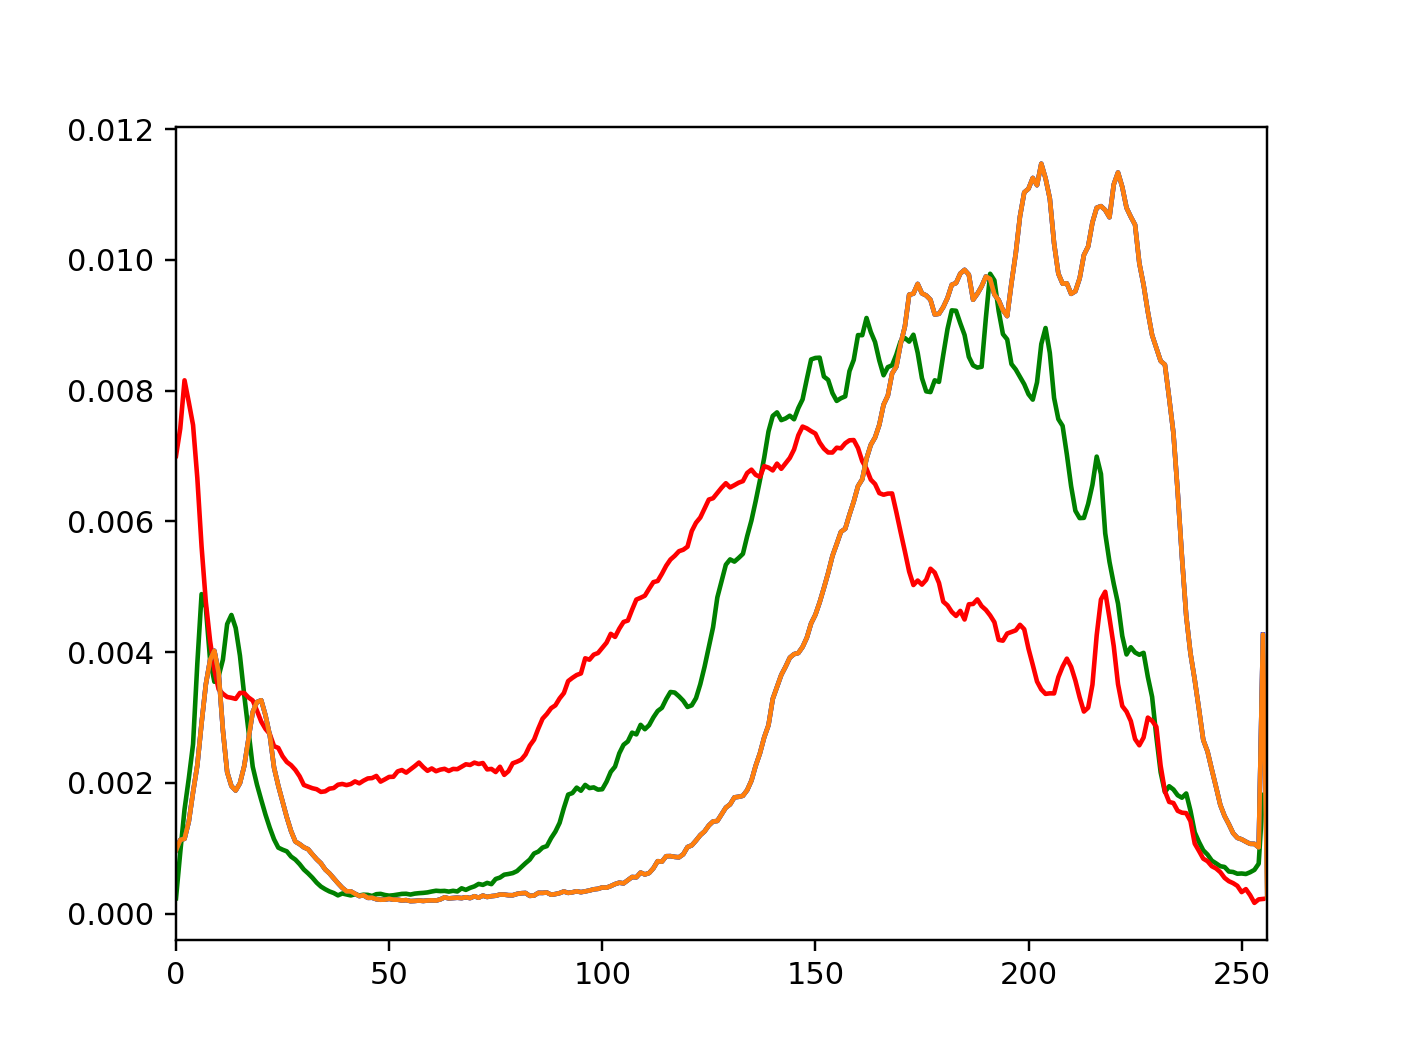

(256, 1)
[1.]
(256, 1)
[1.0000001]


In [69]:
%matplotlib notebook

show_color_histogram(cv2.imread(IMAGE_FILE))

Expected
![](https://lmcaraig.com/content/images/2017/12/combo-light-tones-col.png)

### Vector Similarity/Distance between Two Histograms

In [95]:
import numpy as np
import scipy.spatial.distance

In [102]:
def chi2_distance(histA, histB, eps = 1e-10):
    # compute the chi-squared distance
    d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
        for (a, b) in zip(histA, histB)])

    # return the chi-squared distance
    return d

In [98]:
def calc_bgr_hist_flatten(image):
    # assume BGR image
    hists = []
    for i in range(3):
        h = calcHistNormalized([image], [i,], None, [256], [0, 256])
        hists.append(h)
        
    return np.concatenate(hists)

In [100]:
hist1 = calc_bgr_hist_flatten(cv2.imread(IMAGE_FILE))
print hist1.shape
hist_hydrant = calc_bgr_hist_flatten(cv2.imread(IMAGE_HYDRANT))
hist_hydrant_2 = calc_bgr_hist_flatten(cv2.imread(IMAGE_HYDRANT_2))

(768, 1)


In [104]:
print "Distance between same image:", chi2_distance(hist1, hist1)
print "Distance between different images:", chi2_distance(hist1, hist_hydrant)
print "Distance between similar images:", chi2_distance(hist_hydrant_2, hist_hydrant)

Distance between same image: 0.0
Distance between different images: 1.2449110746383667
Distance between similar images: 1.08837890625


In [105]:
print "Distance between same image:", scipy.spatial.distance.cosine(hist1, hist1)
print "Distance between different images:", scipy.spatial.distance.cosine(hist1, hist_hydrant)
print "Distance between similar images:", scipy.spatial.distance.cosine(hist_hydrant_2, hist_hydrant)

Distance between same image: 0.0
Distance between different images: 0.5526608228683472
Distance between similar images: 0.5662317276000977


<IPython.core.display.Javascript object>


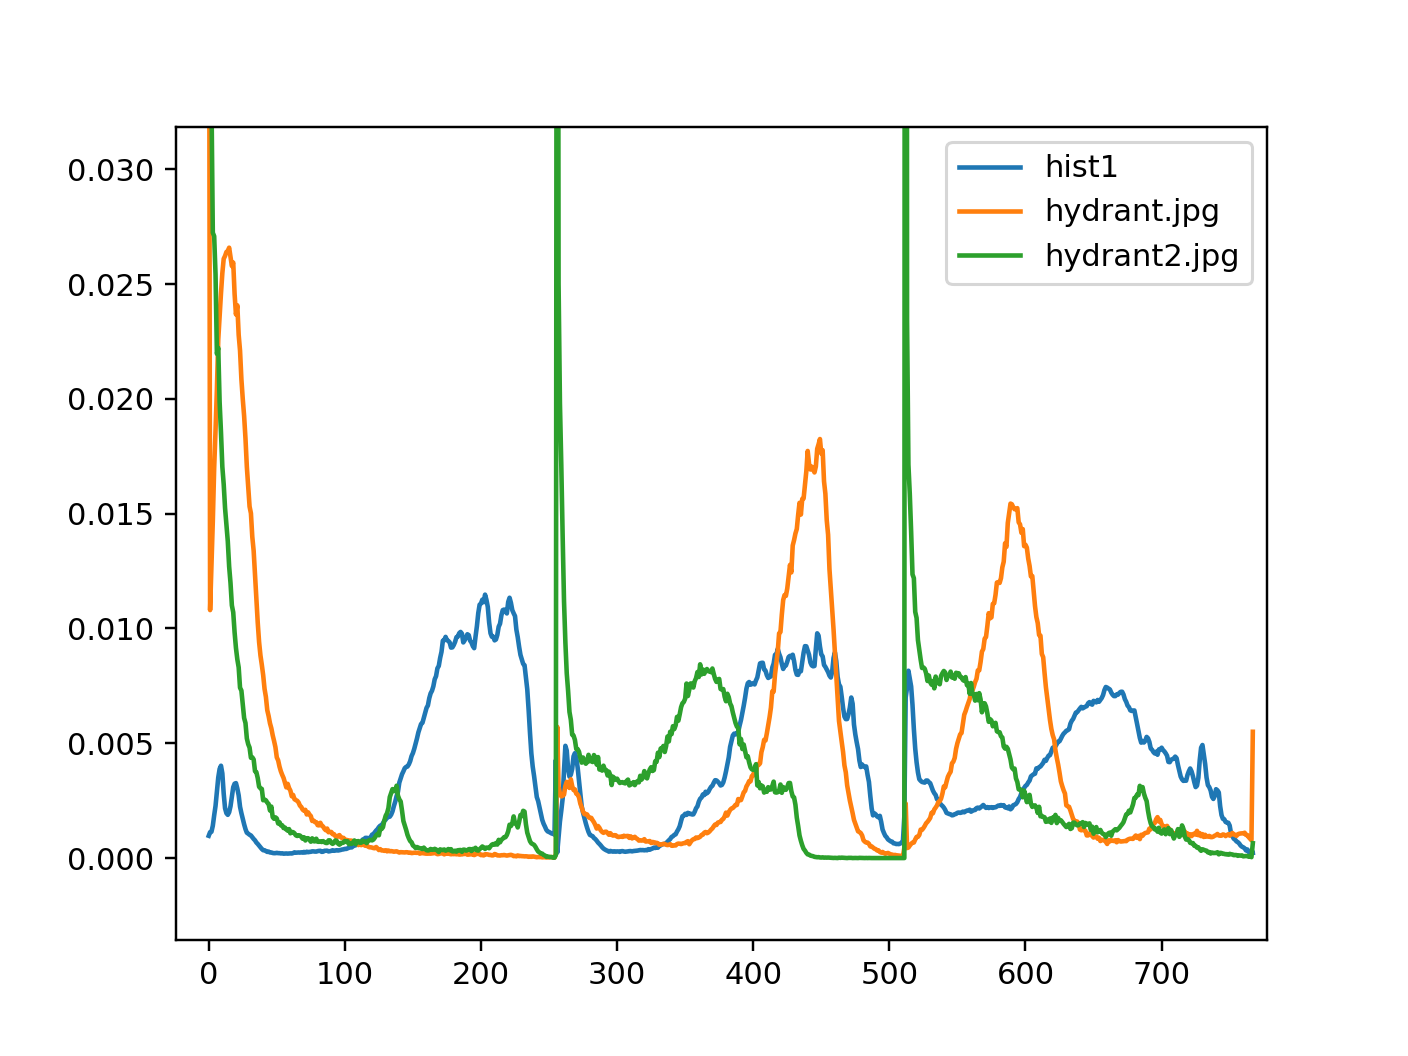

In [94]:
%matplotlib notebook

plt.plot(hist1, label='hist1')
plt.plot(hist_hydrant, label='hydrant.jpg')
plt.plot(hist_hydrant_2, label='hydrant2.jpg')
plt.legend()
plt.show()